In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/kaggle/input/zomato-restaurant-dataset/enhanced_zomato_dataset_clean.csv')


In [2]:
# Group data by City and Cuisine for average rating and pricing
trend_df = df.groupby(['City', 'Cuisine']).agg({
    'Average_Rating': 'mean',
    'Prices': 'mean',
    'Restaurant_Name': 'count'  # Popularity proxy
}).rename(columns={'Restaurant_Name': 'Restaurant_Count'}).reset_index()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


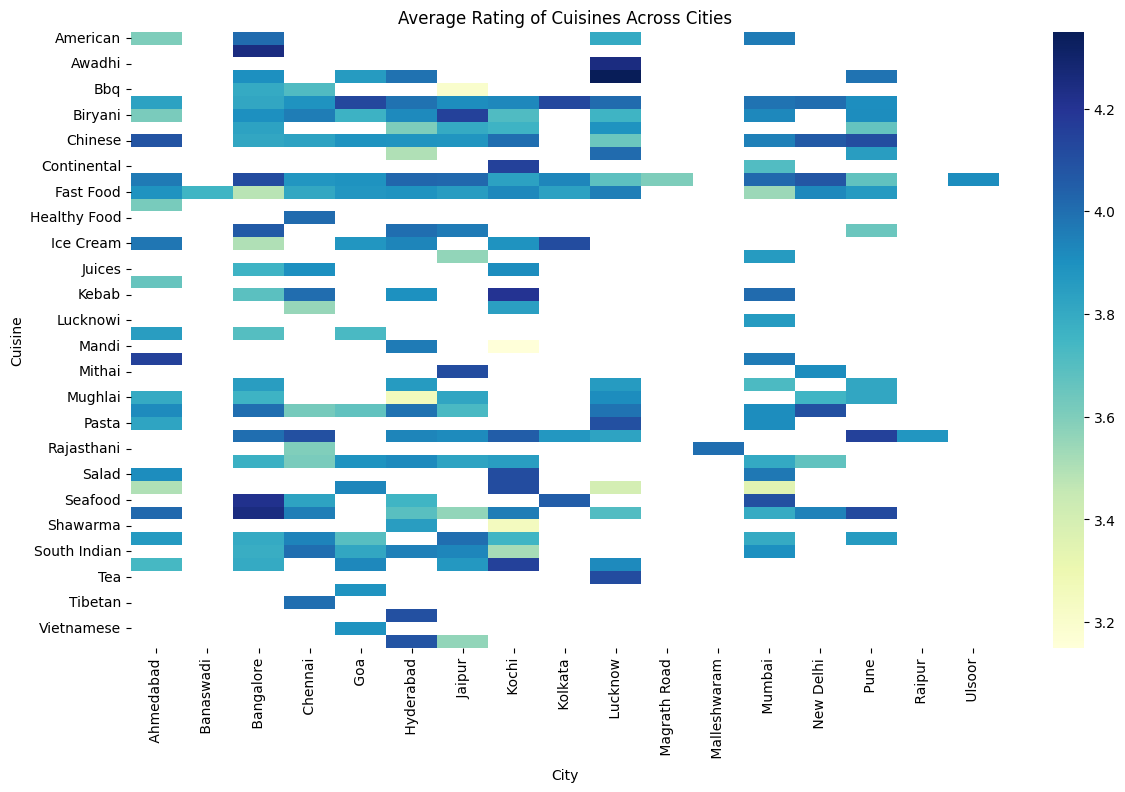

In [3]:
pivot_rating = trend_df.pivot(index='Cuisine', columns='City', values='Average_Rating')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_rating, cmap='YlGnBu', annot=False)
plt.title("Average Rating of Cuisines Across Cities")
plt.xlabel("City")
plt.ylabel("Cuisine")
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


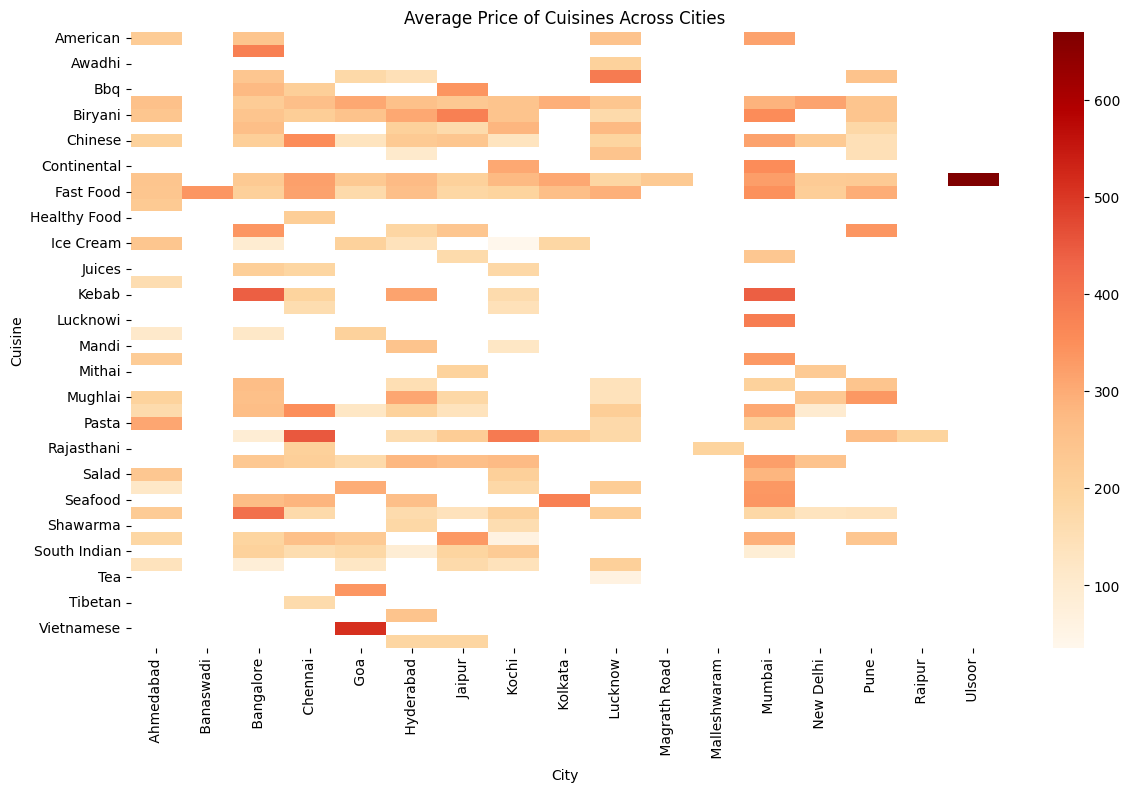

In [4]:
pivot_price = trend_df.pivot(index='Cuisine', columns='City', values='Prices')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_price, cmap='OrRd', annot=False)
plt.title("Average Price of Cuisines Across Cities")
plt.xlabel("City")
plt.ylabel("Cuisine")
plt.show()


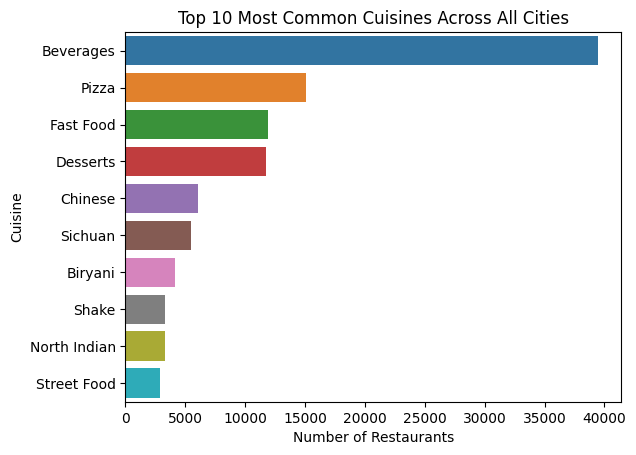

In [5]:
top_cuisines = trend_df.groupby('Cuisine')['Restaurant_Count'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_cuisines.index, x=top_cuisines.values)
plt.title("Top 10 Most Common Cuisines Across All Cities")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


In [6]:
# Interactive cuisine vs price scatter (hover to explore)
fig = px.scatter(trend_df, x='Prices', y='Average_Rating',
                 size='Restaurant_Count', color='Cuisine',
                 hover_name='City', title="Cuisine Rating vs Price (by City)")
fig.show()
